In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [110]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [103]:
data = load_iris()

In [107]:
X = data.data
y = data.target
#Creating a Dataframe for viewing
df = pd.DataFrame(X,columns= data.feature_names)
df["Target"] = data.target

In [108]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [113]:
model = KNeighborsClassifier()

In [127]:
param_grid = {
    "n_neighbors" : list(range(1,11))
}

In [128]:
grid = GridSearchCV(estimator = model,cv= 5,param_grid=param_grid,scoring = "accuracy",verbose = 1 , n_jobs = 1)

In [129]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [130]:
print("BEst paramter",grid.best_params_)

BEst paramter {'n_neighbors': 3}


In [131]:
print("Best cross_val accuracy",grid.best_score_)

Best cross_val accuracy 0.9583333333333334


In [133]:
# Selcting best model and using it for prediction
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

In [134]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [136]:
#Evaluation

print("accuracy:\n",accuracy_score(y_test,y_pred))
print("Classificatio_report:\n",classification_report(y_test,y_pred))

accuracy:
 1.0
Classificatio_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



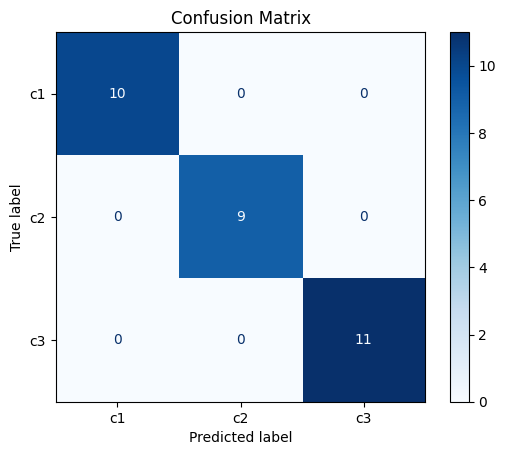

In [137]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["c1","c2","c3"])
display.plot(cmap= plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()